In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


In [52]:
df_t8 = pd.read_csv('../tip1\zv1_zd6_t8_20230622_174706.csv')
df_t8.shape

(7988, 7)

In [53]:
df_t8 = df_t8[df_t8.z == df_t8.z.max()]
# delete the row with x != multiple of 1000
df_t8 = df_t8[df_t8['x'] % 1000 == 0]
df_t8.shape

(2705, 7)

In [54]:
# data = data - data.iloc[0:100].mean()
# standerdize first 4 collumns data
df_t8.iloc[:, 0:4] = StandardScaler().fit_transform(df_t8.iloc[:, 0:4])
# /1000 for the x
df_t8.iloc[:, 4] = df_t8.iloc[:, 4] / 1000

In [55]:
df_t8

,Sensor_0,Sensor_1,Sensor_2,Sensor_3,x,z,time
1183,-1.007427,3.180155,-0.570391,-0.786144,0.0,2880,53.329422
1184,-0.465886,3.396020,-0.556990,-0.784433,0.0,2880,53.392964
1185,-0.796828,3.403559,-0.557819,-0.784956,0.0,2880,53.440048
1186,-0.820228,3.409407,-0.558740,-0.786548,0.0,2880,53.502094
1187,-0.994056,3.410516,-0.558303,-0.785835,0.0,2880,53.562844
...,...,...,...,...,...,...,...
7876,-0.017945,-0.437520,-0.774969,-0.790825,19.0,2880,449.766403
7877,-0.021288,-0.434305,-0.775752,-0.788591,19.0,2880,449.827126
7878,-0.088145,-0.438241,-0.775844,-0.787498,19.0,2880,449.877420
7879,-0.201802,-0.434776,-0.777064,-0.788021,19.0,2880,449.937980


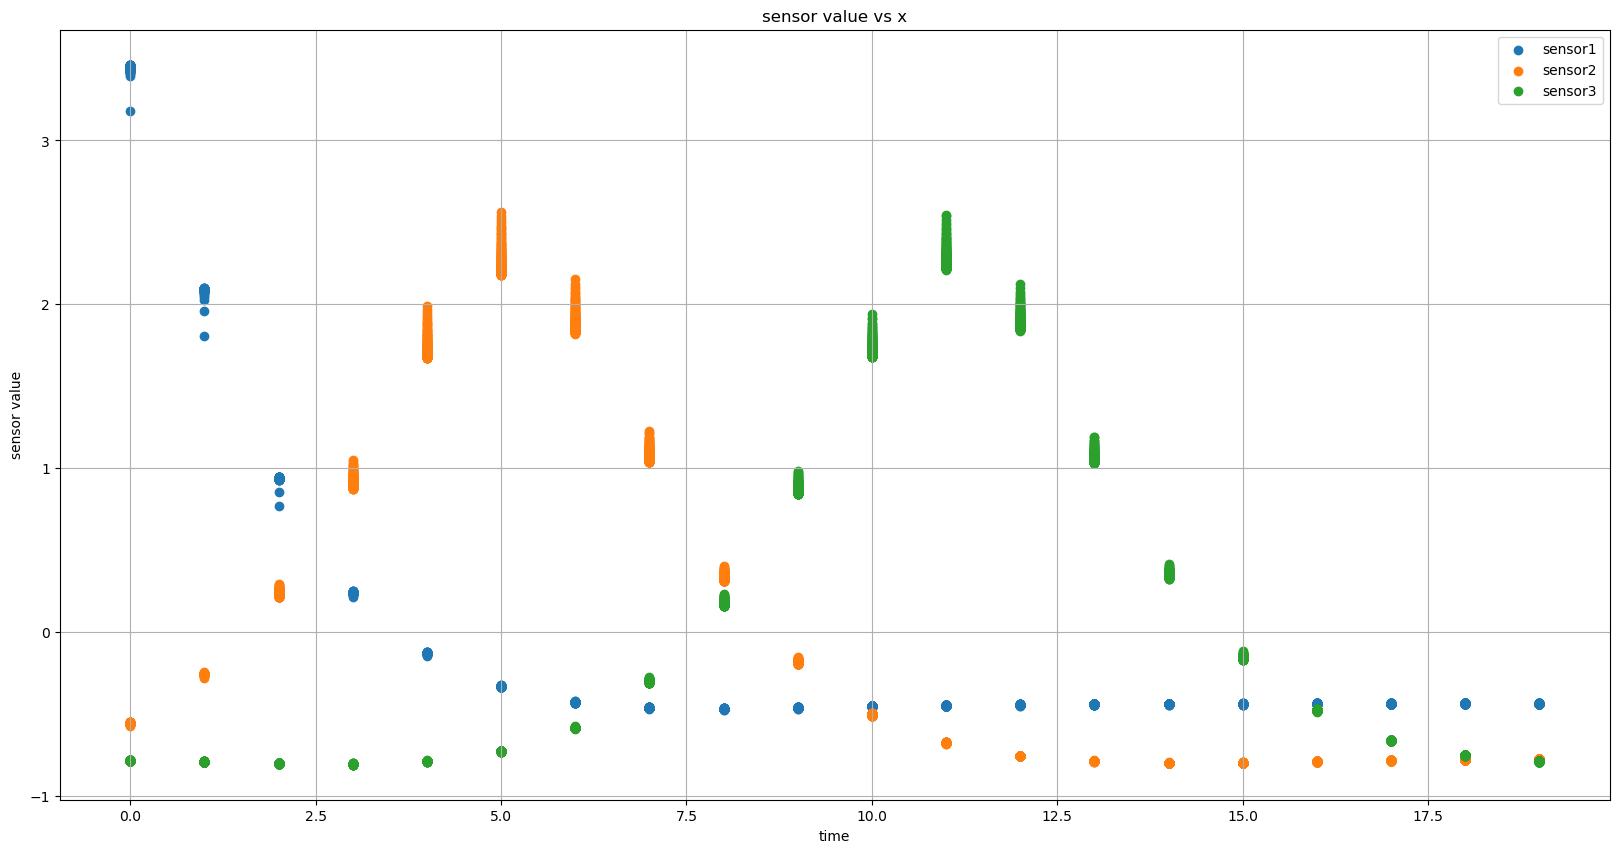

In [56]:
plt.figure(figsize=(20,10))
# plt.scatter(data['x'], data['Sensor_0'], label='sensor0')
plt.scatter(df_t8['x'], df_t8['Sensor_1'], label='sensor1')
plt.scatter(df_t8['x'], df_t8['Sensor_2'], label='sensor2')
plt.scatter(df_t8['x'], df_t8['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('time')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [68]:
X = df_t8[['Sensor_1', 'Sensor_2', 'Sensor_3']]
y = df_t8['x']

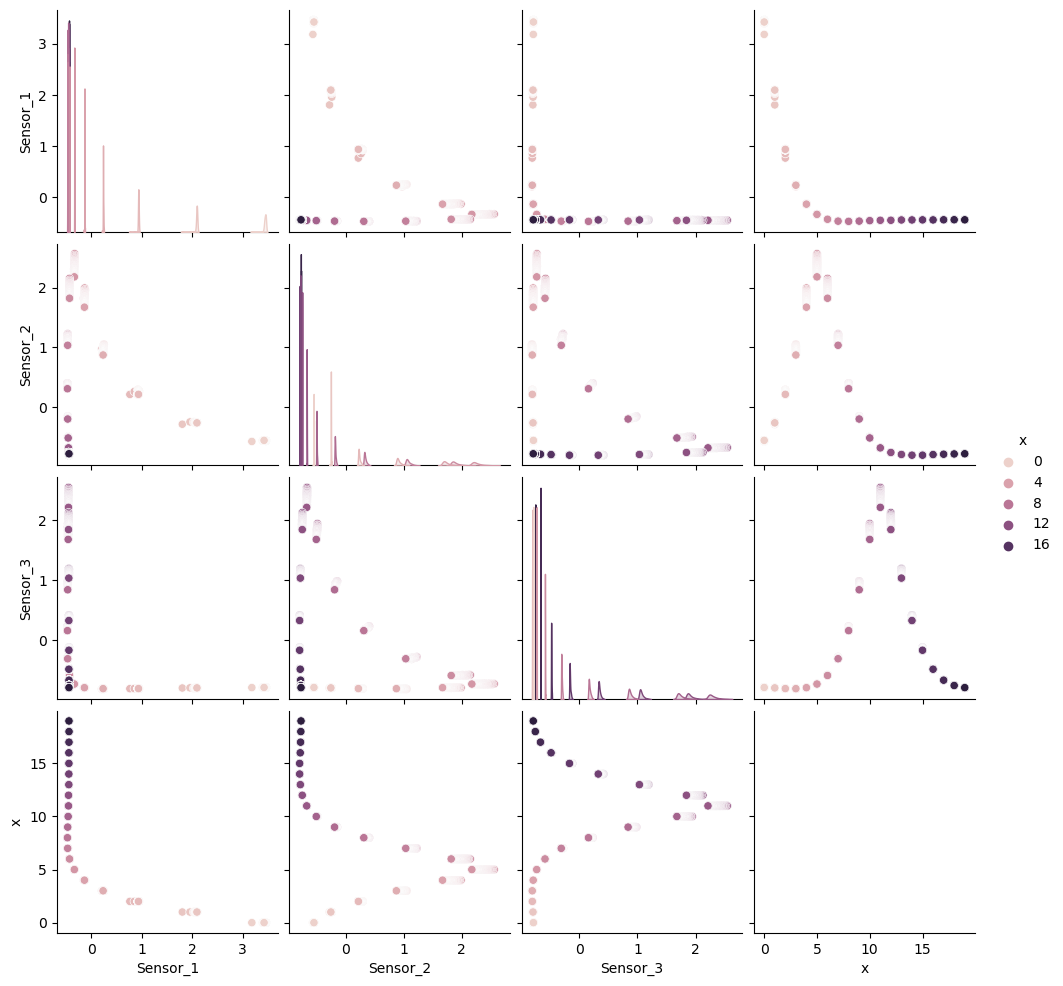

In [58]:
sns.pairplot(df_t8, vars=['Sensor_1', 'Sensor_2', 'Sensor_3', 'x'], hue='x')
plt.show()

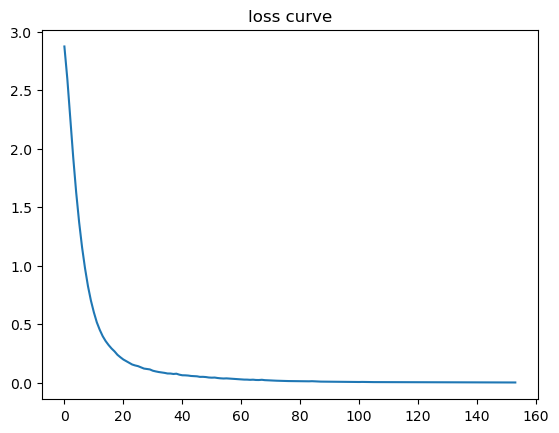

In [70]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# train the model, 3 layers, 100 neurons each layer
mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
mlp.fit(X_train, y_train)


# plot the loss curve
plt.plot(mlp.loss_curve_)
plt.title('loss curve')

# predict
y_pred = mlp.predict(X_test)


In [71]:
# Show the training and testing accuracies
print('Training accuracy: ', accuracy_score(y_train, mlp.predict(X_train)))
print('Testing accuracy: ', accuracy_score(y_test, y_pred))



Training accuracy:  1.0
Testing accuracy:  1.0


In [72]:
df_t0 = pd.read_csv('../tip1/zv1_zd6_t0_20230622_180037.csv')
df_t0.shape

(5023, 7)

In [63]:
# same data cleaning process as above
df_t0 = df_t0[df_t0.z == df_t0.z.max()]
df_t0 = df_t0[df_t0['x'] % 1000 == 0]
df_t0.shape

# df_t0.iloc[:, 0:4] = StandardScaler().fit_transform(df_t0.iloc[:, 0:4])


(6, 7)

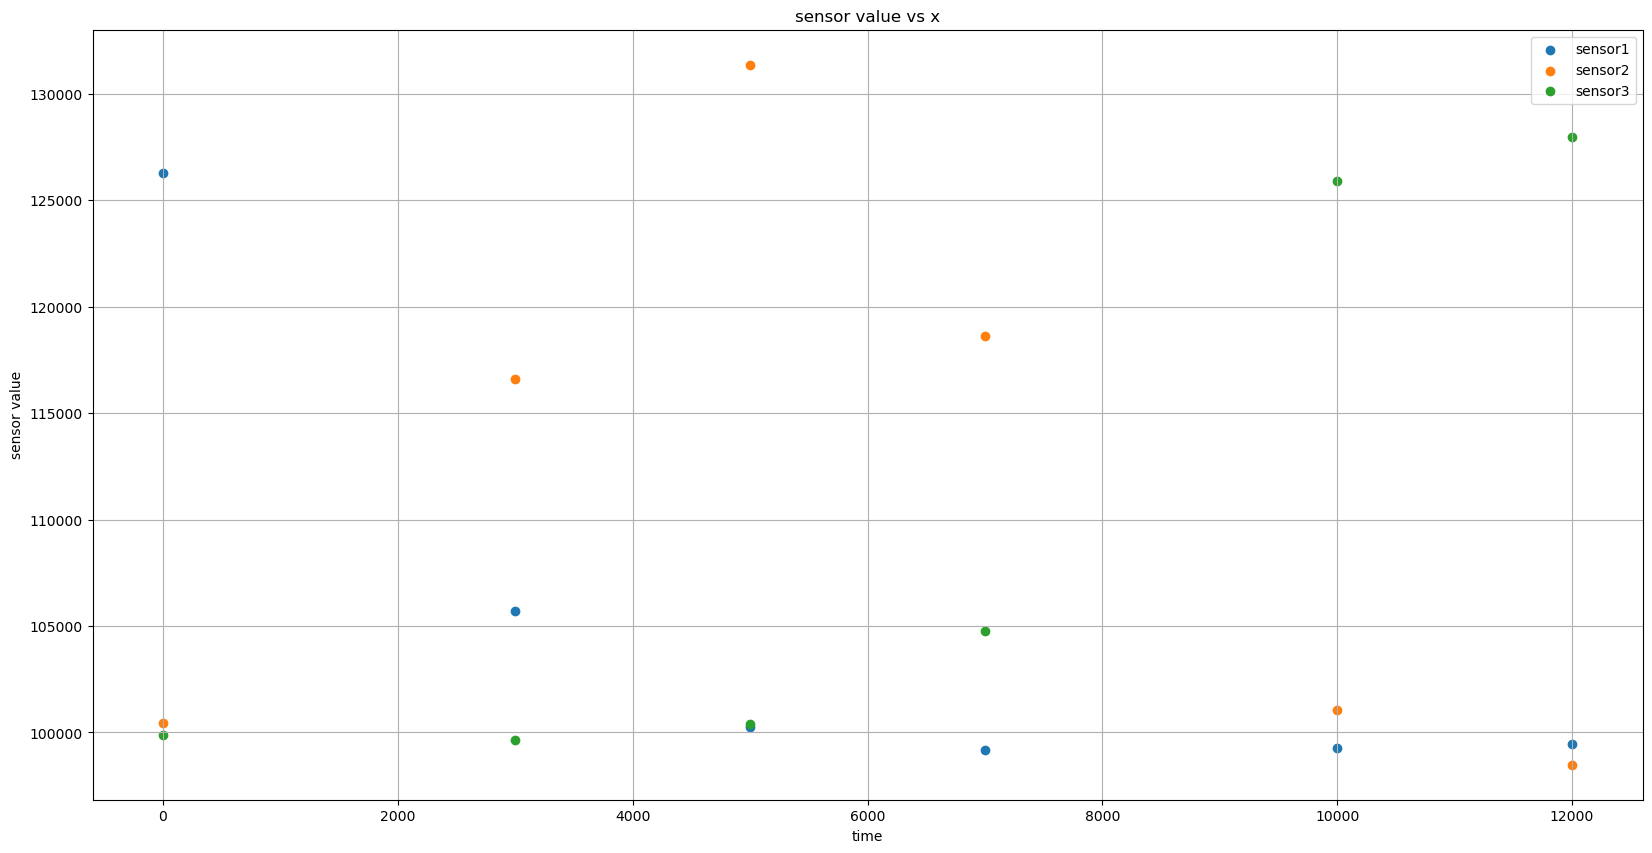

In [64]:
# plot the data
plt.figure(figsize=(20,10))
plt.scatter(df_t0['x'], df_t0['Sensor_1'], label='sensor1')
plt.scatter(df_t0['x'], df_t0['Sensor_2'], label='sensor2')
plt.scatter(df_t0['x'], df_t0['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('time')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

In [65]:
# test data
X_test = df_t0[['Sensor_1', 'Sensor_2', 'Sensor_3']]
y_test = df_t0['x']

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
# Show the first 10 wrong predictions with the correct value
print(f"Wrong predictions: {np.where(y_test != y_pred)[0][:10]}")

Accuracy: 0.0
Wrong predictions: [0 1 2 3 4 5]


In [66]:
y_pred

array([11., 11., 11., 11., 11., 11.])

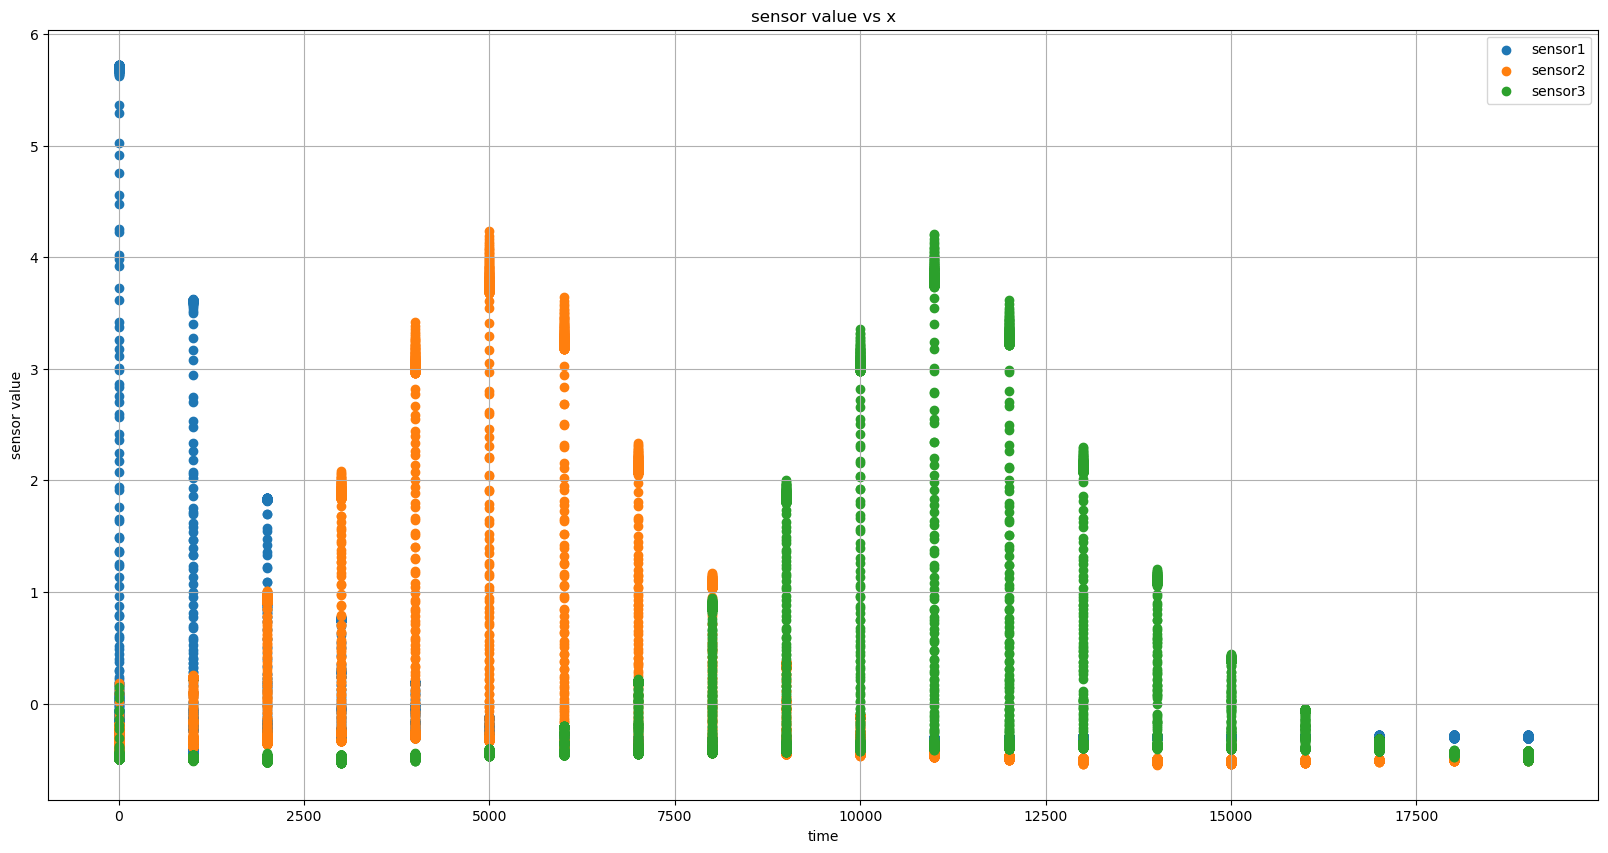

In [26]:
plt.figure(figsize=(20,10))
# plt.scatter(data['x'], data['Sensor_0'], label='sensor0')
plt.scatter(y_pred, data['Sensor_1'], label='sensor1')
plt.scatter(y_pred, data['Sensor_2'], label='sensor2')
plt.scatter(y_pred, data['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('time')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

c:\Users\59784\.conda\envs\data\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


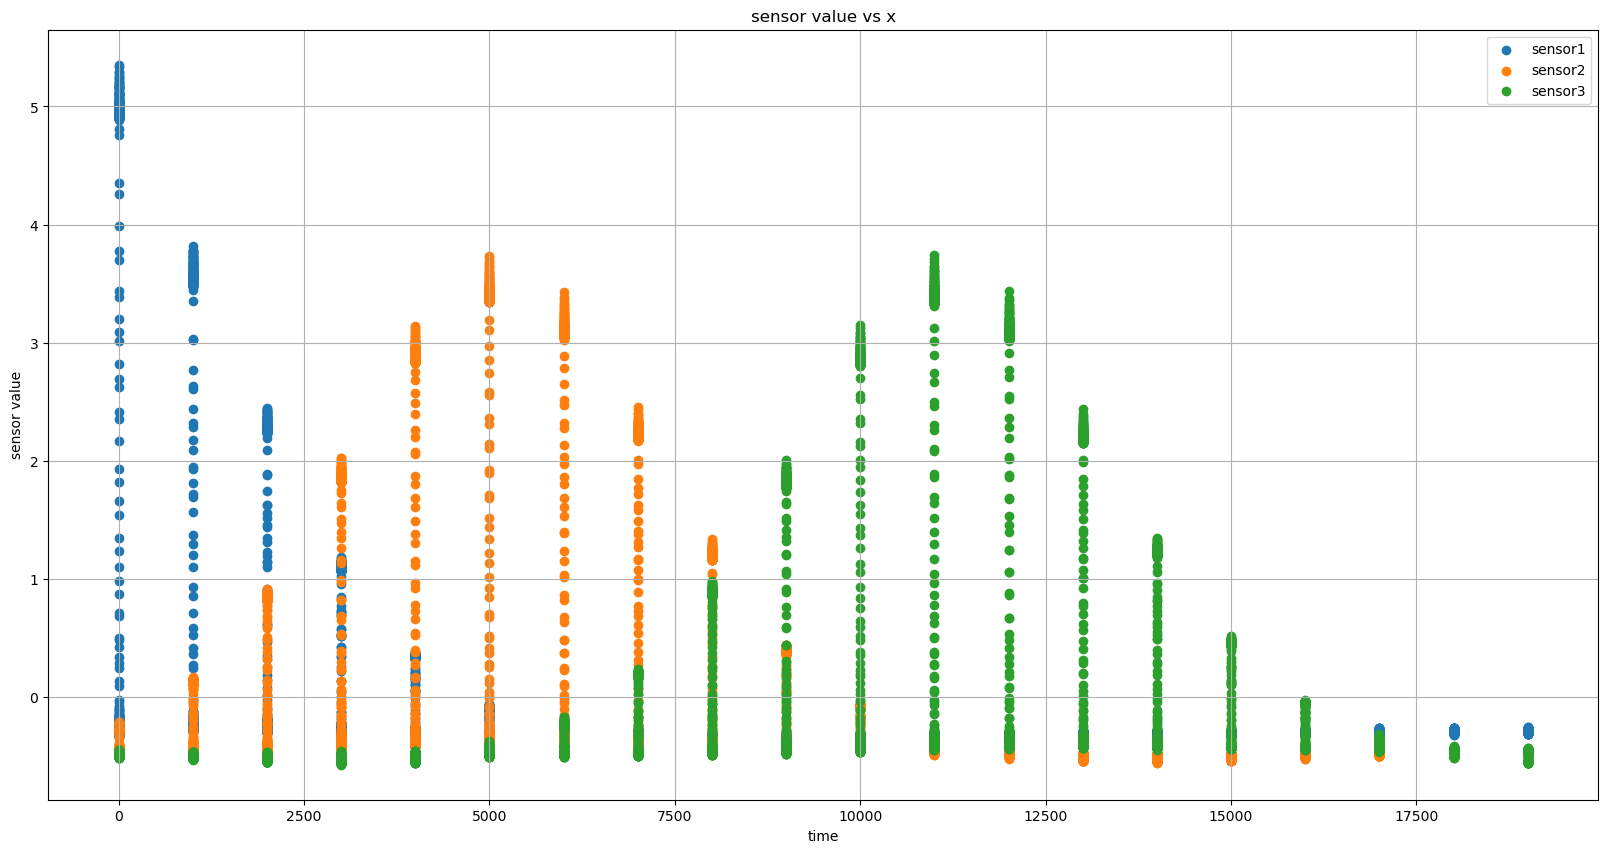

In [32]:
# import another dataset to test the model
df2 = pd.read_csv('../tip1\zv1_zd5_t8_20230622_181736.csv')

#do the same data preprocessing
data2 = df2
data2 = data2[data2['x'] % 1000 == 0]
data2.iloc[:, 0:4] = StandardScaler().fit_transform(data2.iloc[:, 0:4])

# Plot the data
plt.figure(figsize=(20,10))
# plt.scatter(data['x'], data['Sensor_0'], label='sensor0')
plt.scatter(data2['x'], data2['Sensor_1'], label='sensor1')
plt.scatter(data2['x'], data2['Sensor_2'], label='sensor2')
plt.scatter(data2['x'], data2['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('time')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()


In [33]:
# Predict the x value
X2 = data2[['Sensor_1', 'Sensor_2', 'Sensor_3']]
y2 = data2['x']
y2_pred = mlp.predict(X2)

# Calculate the accuracy
accuracy2 = accuracy_score(y2, y2_pred)
print(f"Accuracy: {accuracy2}")
# Show the first 100 wrong predictions with the correct value
print(f"Wrong predictions: {np.where(y2 != y2_pred)[0][:100]}")


Accuracy: 0.413905409232512
Wrong predictions: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


Use all the dataset

In [39]:
# Use all the csv file from tip1 folder to train the model
# and test the model with the csv file from tip2 folder
import glob
import os

# Get all the csv file from tip1 folder, start with zv1
os.chdir("../tip1")
extension = 'csv'
all_files = [i for i in glob.glob('zv1*.{}'.format(extension))]
print(all_files)

# Read all the csv file and store them in a list
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

# Concatenate all the csv file into one dataframe
df_3 = pd.concat(li, axis=0, ignore_index=True)

# Do the same data preprocessing
data_3 = df_3
data_3 = data_3[data_3['x'] % 1000 == 0]
data_3.iloc[:, 0:4] = StandardScaler().fit_transform(data_3.iloc[:, 0:4])




['zv1_zd5_t0_20230622_181109.csv', 'zv1_zd5_t8_20230622_181736.csv', 'zv1_zd6_t0_20230622_180037.csv', 'zv1_zd6_t8_20230622_174706.csv', 'zv1_zd7_t8_20230622_182859.csv']


c:\Users\59784\.conda\envs\data\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


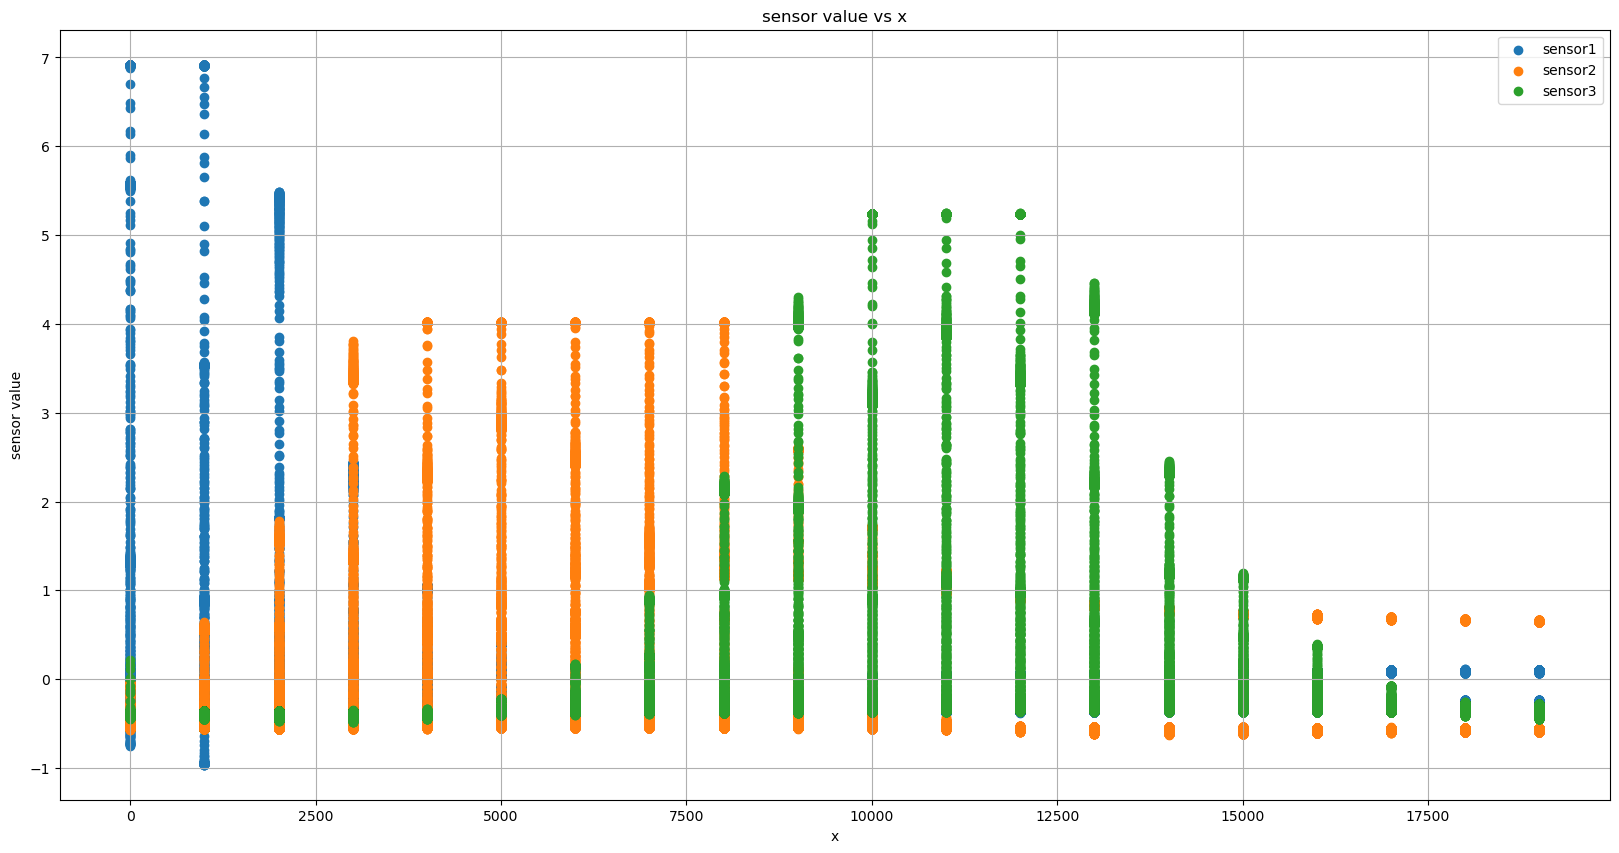

In [43]:
# plot the data
plt.figure(figsize=(20,10))
# plt.scatter(data['x'], data['Sensor_0'], label='sensor0')
plt.scatter(data_3['x'], data_3['Sensor_1'], label='sensor1')
plt.scatter(data_3['x'], data_3['Sensor_2'], label='sensor2')
plt.scatter(data_3['x'], data_3['Sensor_3'], label='sensor3')
plt.legend()
plt.xlabel('x')
plt.ylabel('sensor value')
plt.title('sensor value vs x')
plt.grid(True)
plt.show()

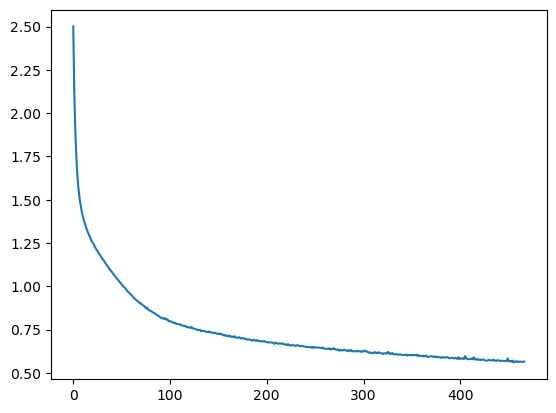

In [44]:
# Train the model
X_3 = data_3[['Sensor_1', 'Sensor_2', 'Sensor_3']]
y_3 = data_3['x']
mlp_3 = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
# show the traininf loss curve
mlp_3.fit(X_3, y_3)
plt.plot(mlp_3.loss_curve_)
plt.show()

In [68]:
# Predict the x value
y_3_pred = mlp_3.predict(X_3)

# Calculate the accuracy
accuracy_3 = accuracy_score(y_3, y_3_pred)
print(f"Accuracy: {accuracy_3}")
# Show the first 100 wrong predictions with the correct value
print(f"Wrong predictions: {np.where(y_3 != y_3_pred)[0][:100]}")


Accuracy: 0.5970425480724743
Wrong predictions: [ 721  849  906  924  943  945  968  970  971  973 1013 1014 1050 1052
 1056 1057 1058 1060 1062 1064 1065 1067 1069 1071 1073 1078 1079 1080
 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094
 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108
 1109 1110 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122
 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136
 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1154 1180 1183
 1184 1185]


In [65]:
X_3 = data_3[['Sensor_1', 'Sensor_2', 'Sensor_3']]
len(X_3)

54033

In [60]:
data_3.shape

(54033, 5)

In [55]:
type(y_3_pred)

numpy.ndarray

In [73]:
# Remove z and time column, including header
data_3_result = data_3.iloc[:, 1:4]
# add new collumn to the training data
data_3_result['x'] = y_3
data_3_result['x_pred'] = y_3_pred
data_3_result.head()


,Sensor_1,Sensor_2,Sensor_3,x,x_pred
0,-0.336145,-0.558555,-0.371388,0,0
1,-0.336851,-0.562706,-0.372777,0,0
2,-0.341664,-0.560194,-0.370473,0,0
3,-0.337847,-0.560538,-0.372269,0,0
4,-0.338635,-0.563050,-0.372946,0,0


In [74]:
data_3_result

,Sensor_1,Sensor_2,Sensor_3,x,x_pred
0,-0.336145,-0.558555,-0.371388,0,0
1,-0.336851,-0.562706,-0.372777,0,0
2,-0.341664,-0.560194,-0.370473,0,0
3,-0.337847,-0.560538,-0.372269,0,0
4,-0.338635,-0.563050,-0.372946,0,0
...,...,...,...,...,...
54028,-0.292686,-0.460490,-0.441719,19000,3000
54029,-0.292956,-0.459777,-0.444514,19000,3000
54030,-0.283093,-0.463608,-0.444604,19000,3000
54031,-0.299848,-0.456659,-0.436490,19000,3000


In [75]:
# export the result to csv file
data_3_result.to_csv('result.csv', index=False)


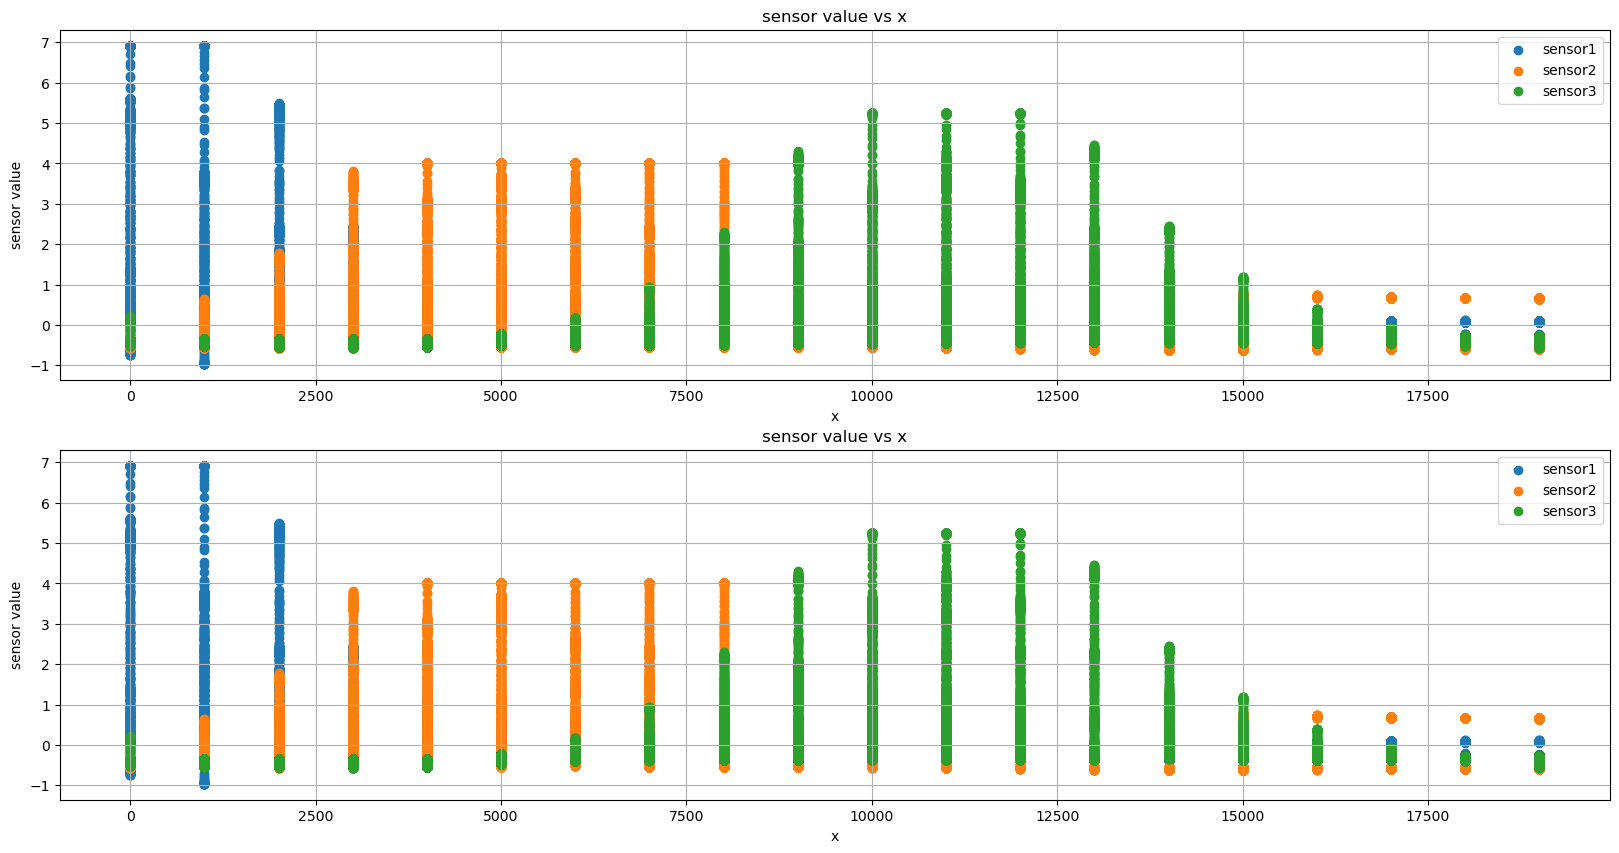

In [79]:
# subplot the data original data and the predicted data seperately
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].scatter(data_3['x'], data_3['Sensor_1'], label='sensor1')
axs[0].scatter(data_3['x'], data_3['Sensor_2'], label='sensor2')
axs[0].scatter(data_3['x'], data_3['Sensor_3'], label='sensor3')
axs[0].legend()
axs[0].set_xlabel('x')
axs[0].set_ylabel('sensor value')
axs[0].set_title('sensor value vs x')
axs[0].grid(True)

axs[1].scatter(data_3_result['x_pred'], data_3_result['Sensor_1'], label='sensor1')
axs[1].scatter(data_3_result['x_pred'], data_3_result['Sensor_2'], label='sensor2')
axs[1].scatter(data_3_result['x_pred'], data_3_result['Sensor_3'], label='sensor3')
axs[1].legend()
axs[1].set_xlabel('x')
axs[1].set_ylabel('sensor value')
axs[1].set_title('sensor value vs x')
axs[1].grid(True)

plt.show()





In [80]:
# Use the model to predict the x value for data
df = pd.read_csv('../tip1\zv1_zd6_t8_20230622_174706.csv')
df.shape

# Do the same data preprocessing
data = df
data = data[data['x'] % 1000 == 0]
data.iloc[:, 0:4] = StandardScaler().fit_transform(data.iloc[:, 0:4])

# Predict the x value
X = data[['Sensor_1', 'Sensor_2', 'Sensor_3']]
y = data['x']
y_pred = mlp_3.predict(X)

# Calculate the accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")
# Show the first 100 wrong predictions with the correct value
print(f"Wrong predictions: {np.where(y != y_pred)[0][:100]}")



Accuracy: 0.32079757698132255
Wrong predictions: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


c:\Users\59784\.conda\envs\data\lib\site-packages\pandas\core\indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [81]:
# Remove z and time column, including header
data_result = data.iloc[:, 1:4]
# add new collumn to the training data
data_result['x'] = y
data_result['x_pred'] = y_pred
data_result.head()


,Sensor_1,Sensor_2,Sensor_3,x,x_pred
0,-0.155359,-0.413481,-0.468690,0,2000
1,-0.157796,-0.413742,-0.474596,0,2000
2,-0.153222,-0.413122,-0.474059,0,2000
3,-0.155188,-0.414980,-0.473522,0,2000
4,-0.158437,-0.415926,-0.476978,0,1000


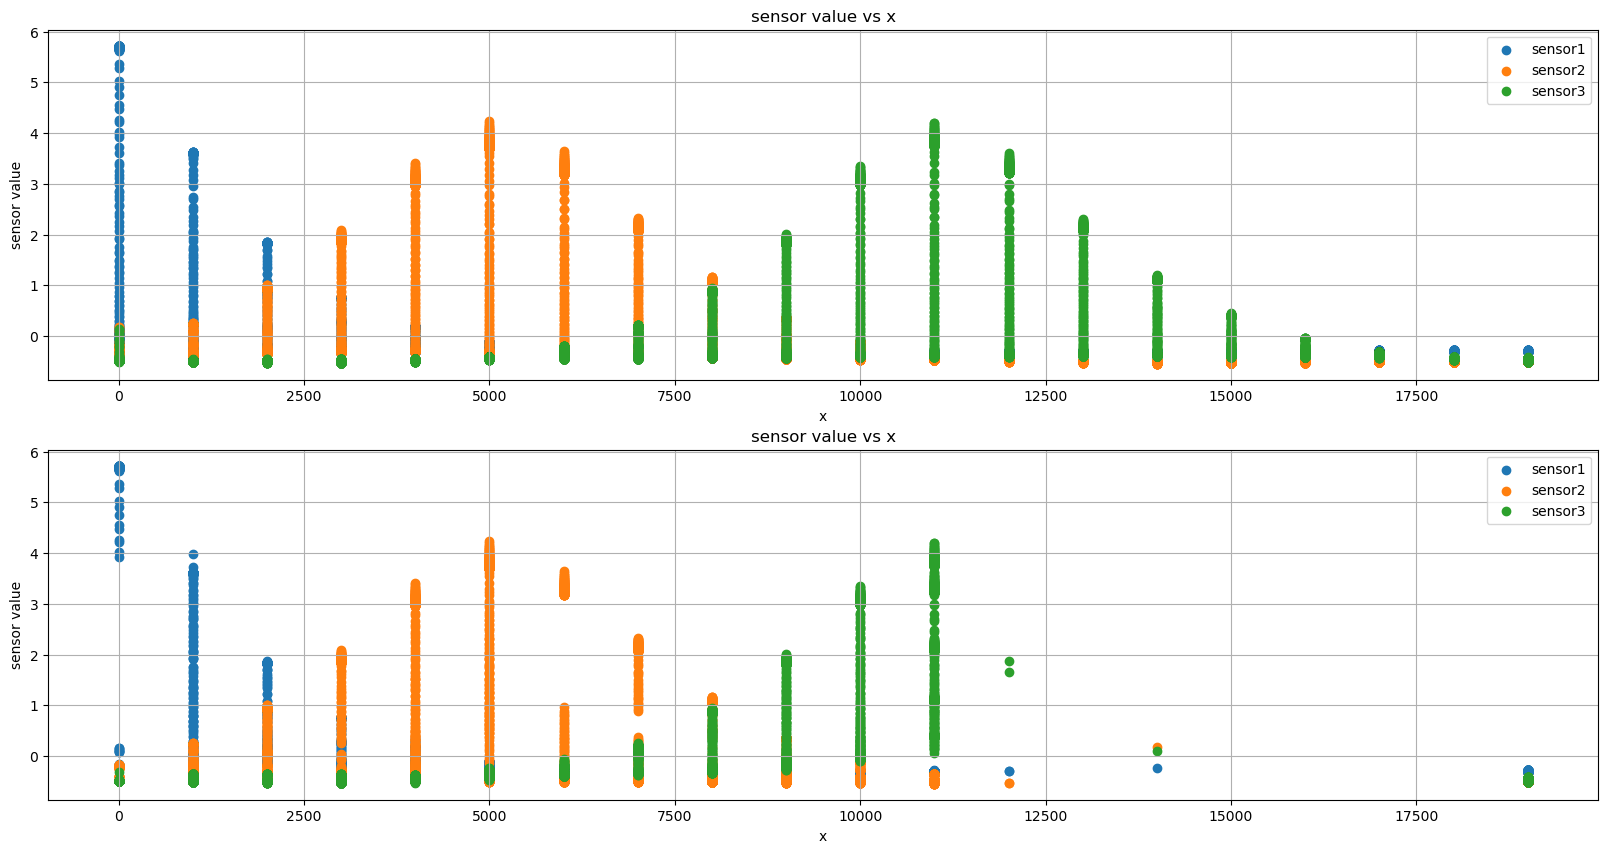

In [82]:
# make subplot for the original data and the predicted data
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].scatter(data['x'], data['Sensor_1'], label='sensor1')
axs[0].scatter(data['x'], data['Sensor_2'], label='sensor2')
axs[0].scatter(data['x'], data['Sensor_3'], label='sensor3')
axs[0].legend()
axs[0].set_xlabel('x')
axs[0].set_ylabel('sensor value')
axs[0].set_title('sensor value vs x')
axs[0].grid(True)

axs[1].scatter(data_result['x_pred'], data_result['Sensor_1'], label='sensor1')
axs[1].scatter(data_result['x_pred'], data_result['Sensor_2'], label='sensor2')
axs[1].scatter(data_result['x_pred'], data_result['Sensor_3'], label='sensor3')
axs[1].legend()
axs[1].set_xlabel('x')
axs[1].set_ylabel('sensor value')
axs[1].set_title('sensor value vs x')
axs[1].grid(True)

plt.show()
